# Time step analysis
Average temperature_Tetra
2024-09-10 yanjun zhang

# Average
only tetrahedral

Lables already exists, for mesh m-3-3.msh is  [94411, 114209, 8995]
t and T have been successfully extracted from /home/yanjun/documents/sim_results/thermal_2024/dc_2025/3-3/s-304-d-448-m-3-3-c-0.2-e-1184080/Result_T-s-304-d-448-m-3-3-c-0.2-e-1184080.csv
Lables already exists, for mesh m-3-3.msh is  [94411, 114209, 8995]
t and T have been successfully extracted from /home/yanjun/documents/sim_results/thermal_2024/dc_2025/3-3/s-304-d-448-m-3-3-c-0.5-e-1184080/Result_T-s-304-d-448-m-3-3-c-0.5-e-1184080.csv
Lables already exists, for mesh m-3-3.msh is  [94411, 114209, 8995]
t and T have been successfully extracted from /home/yanjun/documents/sim_results/thermal_2024/dc_2025/3-3/s-304-d-448-m-3-3-c-1-e-1184080/Result_T-s-304-d-448-m-3-3-c-1-e-1184080.csv


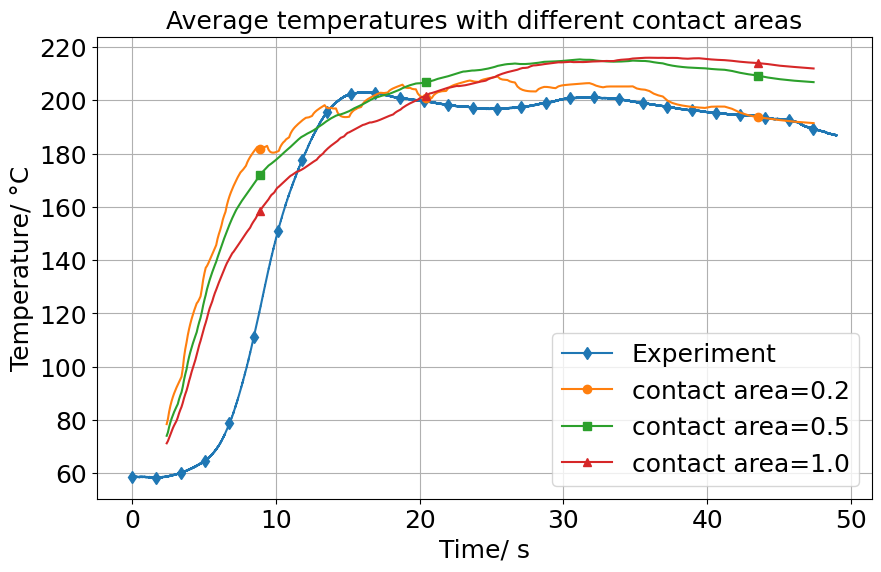

In [1]:
import os
import shutil
import pandas as pd
import re
import sys
import matplotlib.pyplot as plt
import numpy as np

sys.path.append('/home/yanjun/documents/fenicsx/therm_disc/')
from disc_f import *
source_dir = '/home/yanjun/documents/sim_results/thermal_2024/dc_2025/3-3/'

# Collect all CSV files from the destination directory
csv_files = collect_csv_files(source_dir)
type1 = 'contact_area'
csv_files.sort(key=lambda x: extract_file_labels(x,type1))

plt.figure(figsize=(10, 6))

df1     = pd.read_csv('/home/yanjun/documents/sim_results/experiment_result.csv')
T_e_ave = ( df1.iloc[:,1] + df1.iloc[:,3] + df1.iloc[:,5] ) /3
t_e     = np.linspace (0, 49, len(T_e_ave) )
plt.plot(t_e, T_e_ave, label= "Experiment",marker='d',markevery=1000)

j = 0
marker_styles = ['o', 's', '^', 'v', '>', '<','d', '*', 'x', 'p'] 

for csv_file in csv_files:
    lables    = find_3_coord(  extract_mesh_labels(csv_file)  )
    t,T       = read_t_T ( csv_file )
    contact_n =  extract_file_labels(csv_file, type1)
    #calculate average temperature
    T_3_ave   = []
    for i in range(len(T)):
        T_3_all =  T[i][ lables[0] ] + T[i][ lables[1] ] + T[i][ lables[2] ]   
        T_3_ave.append ( T_3_all / 3 )
    plt.plot(t,pd.Series(T_3_ave).rolling(window=30).mean(),label= f'contact area={ contact_n }',
             marker=marker_styles[j], markevery=100)
    j += 1

fontsize_global = 18

plt.xticks(fontsize=fontsize_global)
plt.yticks(fontsize=fontsize_global)

plt.xlabel('Time/ s', fontsize=fontsize_global)
plt.ylabel('Temperature/ °C', fontsize=fontsize_global)
plt.title('Average temperatures with different contact areas', fontsize=fontsize_global)
plt.legend(fontsize=fontsize_global)
plt.grid(True)
plt.savefig('T_ave_dc.png')
plt.show()


In [2]:
print(  extract_file_labels(csv_file, type1) )
print(csv_file)
type(extract_file_labels(csv_file, type1))

0.2
/home/yanjun/documents/sim_results/implicit_dc/s-304-d-448-m-3-5-c-0.2-e-271817/Result_T-s-304-d-448-m-3-5-c-0.2-e-271817.csv


float

## Absolute error

In [1]:
import os
import pandas as pd
import sys
import matplotlib.pyplot as plt
import numpy as np

# Adding path for your custom functions (if needed)
sys.path.append('/home/yanjun/documents/fenicsx/project/therm_disc/')
from disc_f import *  # Assuming this file has functions like collect_csv_files, extract_file_labels, etc.

# Directory containing your simulation results
source_dir = '/home/yanjun/documents/sim_results/implicit_dc/'
csv_files = collect_csv_files(source_dir)
type1 = 'contact_area'
csv_files.sort(key=lambda x: extract_file_labels(x, type1))

# Read experimental data
df1 = pd.read_csv('/home/yanjun/documents/sim_results/experiment_result.csv')
T_e_ave = (df1.iloc[:, 1] + df1.iloc[:, 3] + df1.iloc[:, 5]) / 3  # Average of experimental temperatures

# Initialize lists to store DOF and average relative errors for each case
dc_list = []
avg_relative_errors = []

# Loop over all CSV files (cases)
for csv_file in csv_files:
    labels       = find_3_coord(extract_mesh_labels(csv_file))
    contact_n    =  extract_file_labels(csv_file, type1)
    #dt = 49/ extract_file_labels(csv_file, type1)  # time steps calculation
    # Read simulated time and temperature data
    t, T = read_t_T(csv_file)
    # Calculate average temperature at the three labels
    T_3_ave = []
    for i in range(len(T)):
        T_3_all = T[i][labels[0]] + T[i][labels[1]] + T[i][labels[2]]
        T_3_ave.append(T_3_all / 3)
    import numpy as np
    # Assuming T_e_ave is larger and you want to resize it to match T_3_ave
    # Generate corresponding time arrays for interpolation
    time_T_e_ave = np.linspace(0, 49, len(T_e_ave))  # Time for T_e_ave (example)
    time_T_3_ave = np.linspace(0, 49, len(T_3_ave))  # Time for T_3_ave (example)

    # Interpolate T_e_ave to have the same length as T_3_ave
    T_e_ave_resampled = np.interp(time_T_3_ave, time_T_e_ave, T_e_ave)
    # Now you can safely calculate the relative error
    relative_error = np.abs((T_e_ave_resampled - T_3_ave) / T_e_ave_resampled)
 
    # Compute relative error between experimental (T_e_ave) and simulation (T_3_ave)
    # Store DOF and the average relative error for this case
    dc_list.append(contact_n)
    avg_relative_errors.append(np.mean(relative_error))
    
marker_styles = ['o', 's', '^', 'v', '>', '<','d', '*', 'x', 'p' ] 
# Plot DOF vs Average Relative Error
plt.figure(figsize=(10, 6))
plt.loglog(dc_list, avg_relative_errors, marker='o', linestyle='-', color='b', label="Average Relative Error")

# Label the axes
plt.xlabel('Contact area')
plt.ylabel('Average Relative Error')
plt.title ('Average Relative Error vs Contact Area')

# Add grid and legend
plt.grid(True, which="both", ls="--")
plt.legend()

# Save and display the plot
plt.savefig('avg_relative_error_vs_dc.png')
plt.show()


ModuleNotFoundError: No module named 'disc_f'

In [4]:
print(avg_relative_errors)

[0.16348068230629623, 0.10845138552452507, 0.11259685309578647]


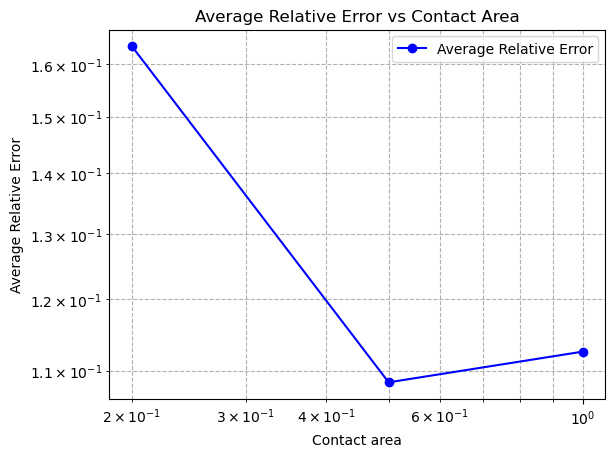

In [3]:
plt.loglog(dc_list, avg_relative_errors, marker='o', linestyle='-', color='b', label="Average Relative Error")

# Label the axes
plt.xlabel('Contact area')
plt.ylabel('Average Relative Error')
plt.title('Average Relative Error vs Contact Area')

# Add grid and legend
plt.grid(True, which="both", ls="--")
plt.legend()

# Save and display the plot
plt.savefig('avg_relative_error_vs_dc.png')
plt.show()

## RMSE

In [ ]:
import os
import pandas as pd
import sys
import matplotlib.pyplot as plt
import numpy as np

# Adding path for your custom functions (if needed)
sys.path.append('/home/yanjun/documents/fenicsx/project/therm_disc/')

from disc_f import *  # Assuming this file has functions like collect_csv_files, extract_file_labels, etc.

# Directory containing your simulation results
source_dir = '/home/yanjun/documents/sim_results/implicit_dc/'

# Collect all CSV files from the directory
csv_files = collect_csv_files(source_dir)

# Sort CSV files by mesh size or other labels (e.g., 'mesh_size')
type1 = 'contact_area'
csv_files.sort(key=lambda x: extract_file_labels(x, type1))

# Read experimental data
df1 = pd.read_csv('/home/yanjun/documents/sim_results/experiment_result.csv')
T_e_ave = (df1.iloc[:, 1] + df1.iloc[:, 3] + df1.iloc[:, 5]) / 3  # Average of experimental temperatures

# Initialize lists to store DOF and average relative errors for each case
dc_list = []
avg_rmse_errors = []

# Loop over all CSV files (cases)
for csv_file in csv_files:
    # Extract mesh information and calculate DOF (elements * 4)
    labels = find_3_coord(extract_mesh_labels(csv_file))
    n_contact = extract_file_labels(csv_file, type1)
   
    # Read simulated time and temperature data
    t, T = read_t_T(csv_file)

    # Calculate average temperature at the three labels
    T_3_ave = []
    for i in range(len(T)):
        T_3_all = T[i][labels[0]] + T[i][labels[1]] + T[i][labels[2]]
        T_3_ave.append(T_3_all / 3)

    time_T_e_ave = np.linspace(0, 49, len(T_e_ave))  # Time for T_e_ave (example)
    time_T_3_ave = np.linspace(0, 49, len(T_3_ave))  # Time for T_3_ave (example)

    # Interpolate T_e_ave to have the same length as T_3_ave
    T_e_ave_resampled = np.interp(time_T_3_ave, time_T_e_ave, T_e_ave)

    sum = 0;
    for i in range(len(T_3_ave)):
        sum = sum + np.abs(T_3_ave[i]-T_e_ave_resampled[i])
    rmse_error = sum/ len(T);


    # Store DOF and the average relative error for this case
    dc_list.append(n_contact)
    avg_rmse_errors.append(rmse_error)

# Plot DOF vs Average Relative Error
plt.figure(figsize=(10, 6))
plt.loglog(dof_list, avg_rmse_errors, marker='o', linestyle='-', color='b', label="RMSE")

# Label the axes
plt.xlabel('Contact area percentage')
plt.ylabel('RMSE')
plt.title('RMSE vs Contact area')

# Add grid and legend

plt.grid(True, which="both", ls="--")
plt.legend()

# Save and display the plot
plt.savefig('RMSE_vs_dc.png')
plt.show()


# Max

In [ ]:
import os
import shutil
import pandas as pd
import re
import sys
import matplotlib.pyplot as plt
import numpy as np


sys.path.append('/home/yanjun/documents/fenicsx/mech_disc/main_simulation/')
from disc_f import *
source_dir = '/home/yanjun/documents/sim_results/thermal_2024/dc_2025/3-3/'

# Collect all CSV files from the destination directory
csv_files = collect_csv_files(source_dir)
type1 = 'contact_area'
csv_files.sort(key=lambda x: extract_file_labels(x,type1))

plt.figure(figsize=(10, 6))

df1 = pd.read_csv('/home/yanjun/documents/sim_results/experiment_result.csv')
T_e_max = np.maximum( np.maximum (df1.iloc[:,1], df1.iloc[:,3]) , df1.iloc[:,5] ) 
t_e = np.linspace (0, 49, len(T_e_max) )
plt.plot(t_e, T_e_max, label= "Experiment",marker='d',markevery=1000)

j = 0
marker_styles = ['o', 's', '^', 'v', '>', '<', 'd' , '*', 'x', 'p'] 

#####
for csv_file in csv_files:
    lables = find_3_coord(  extract_mesh_labels(csv_file)  )
    t,T = read_t_T ( csv_file )
    n_contact = extract_file_labels(csv_file, type1)
    #calculate average temperature
    T_max = []
    for i in range(len(T)):
        T_max.append( max(T[i]) )
    plt.plot(t,pd.Series(T_max).rolling(window=5).mean(),label= f'contact={ n_contact }',
             marker=marker_styles[j], markevery=100)
    j += 1

fontsize_global = 18

plt.xticks(fontsize=fontsize_global)
plt.yticks(fontsize=fontsize_global)

plt.xlabel('Time/ s', fontsize=fontsize_global)
plt.ylabel('Temperature/ °C', fontsize=fontsize_global)
plt.title('The maximum temperatures with different contact areas', fontsize=fontsize_global)
plt.legend(fontsize=fontsize_global)
plt.grid(True)
plt.savefig('T_max_dc.png')
plt.show()



Lables already exists, for mesh m-3-3.msh is  [94411, 114209, 8995]
t and T have been successfully extracted from /home/yanjun/documents/sim_results/thermal_2024/dc_2025/3-3/s-304-d-448-m-3-3-c-0.2-e-1184080/Result_T-s-304-d-448-m-3-3-c-0.2-e-1184080.csv
Lables already exists, for mesh m-3-3.msh is  [94411, 114209, 8995]
t and T have been successfully extracted from /home/yanjun/documents/sim_results/thermal_2024/dc_2025/3-3/s-304-d-448-m-3-3-c-0.5-e-1184080/Result_T-s-304-d-448-m-3-3-c-0.5-e-1184080.csv
Lables already exists, for mesh m-3-3.msh is  [94411, 114209, 8995]


# Relative error

Lables already exists, for mesh m-3-5.msh is  [19098, 34079, 7351]
t and T have been successfully extracted from /home/yanjun/documents/sim_results/implicit_dt/s-3-d-112000-m-3-5-c-1-e-271817/Result_T-s-3-d-112000-m-3-5-c-1-e-271817.csv
Lables already exists, for mesh m-3-5.msh is  [19098, 34079, 7351]
t and T have been successfully extracted from /home/yanjun/documents/sim_results/implicit_dt/s-14-d-11200-m-3-5-c-1-e-271817/Result_T-s-14-d-11200-m-3-5-c-1-e-271817.csv
Lables already exists, for mesh m-3-5.msh is  [19098, 34079, 7351]
t and T have been successfully extracted from /home/yanjun/documents/sim_results/implicit_dt/s-21-d-7168-m-3-5-c-1-e-271817/Result_T-s-21-d-7168-m-3-5-c-1-e-271817.csv
Lables already exists, for mesh m-3-5.msh is  [19098, 34079, 7351]
t and T have been successfully extracted from /home/yanjun/documents/sim_results/implicit_dt/s-40-d-3584-m-3-5-c-1-e-271817/Result_T-s-40-d-3584-m-3-5-c-1-e-271817.csv
Lables already exists, for mesh m-3-5.msh is  [19098, 34

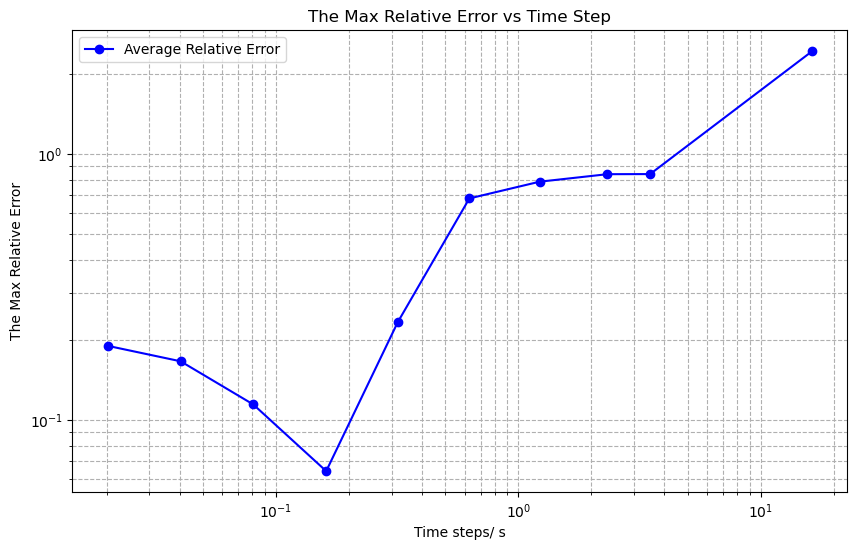

In [1]:
import os
import pandas as pd
import sys
import matplotlib.pyplot as plt
import numpy as np

# Adding path for your custom functions (if needed)
sys.path.append('/home/yanjun/documents/fenicsx/project/therm_disc/implicit/tetrahedron/')
from disc_f import *  # Assuming this file has functions like collect_csv_files, extract_file_labels, etc.

# Directory containing your simulation results
source_dir = '/home/yanjun/documents/sim_results/implicit_dt/'
csv_files = collect_csv_files(source_dir)
type1 = 'time_step'
csv_files.sort(key=lambda x: extract_file_labels(x, type1))

# Read experimental data
df1 = pd.read_csv('/home/yanjun/documents/sim_results/experiment_result.csv')
T_e_max = np.maximum( np.maximum (df1.iloc[:,1], df1.iloc[:,3]) , df1.iloc[:,5] ) 

# Initialize lists to store DOF and average relative errors for each case
dt_list = []
max_relative_errors = []

# Loop over all CSV files (cases)
for csv_file in csv_files:
    labels = find_3_coord(extract_mesh_labels(csv_file))

    time_s = round( (49/extract_file_labels(csv_file, type1)), 5)
    #dt = 49/ extract_file_labels(csv_file, type1)  # time steps calculation
    # Read simulated time and temperature data
    t, T = read_t_T(csv_file)
    # Calculate average temperature at the three labels
    T_3_max = []
    for i in range(len(T)):    
        T_3_max.append( max(T[i]) )
    
    import numpy as np
    # Assuming T_e_ave is larger and you want to resize it to match T_3_ave
    # Generate corresponding time arrays for interpolation
    time_T_e_max = np.linspace(0, 49, len(T_e_max))  # Time for T_e_ave (example)
    time_T_3_max = np.linspace(0, 49, len(T))  # Time for T_3_ave (example)

    # Interpolate T_e_ave to have the same length as T_3_ave
    T_e_max_resampled = np.interp(time_T_3_max, time_T_e_max, T_e_max)
    # Now you can safely calculate the relative error
    relative_error = np.abs((T_e_max_resampled - T_3_max) / T_e_max_resampled)
 
    # Compute relative error between experimental (T_e_ave) and simulation (T_3_ave)
    # Store DOF and the average relative error for this case
    dt_list.append(time_s)
    max_relative_errors.append(np.mean(relative_error))
    
marker_styles = ['o', 's', '^', 'v', '>', '<','d', '*', 'x', 'p' ] 
# Plot DOF vs Average Relative Error
plt.figure(figsize=(10, 6))
plt.loglog(dt_list, max_relative_errors, marker='o', linestyle='-', color='b', label="Average Relative Error")

# Label the axes
plt.xlabel('Time steps/ s')
plt.ylabel('The Max Relative Error')
plt.title('The Max Relative Error vs Time Step')

# Add grid and legend
plt.grid(True, which="both", ls="--")
plt.legend()

# Save and display the plot
plt.savefig('max_relative_error vs_dt.png')
plt.show()
